## import libraries

In [8]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')


## Load dataset (	malignant or benign)

In [9]:
# Load dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print("🔹 Original Dataset:")
df.head()


🔹 Original Dataset:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Preprocess and standardize feature

z= x-μ/σ
where
μ is the feature’s mean and
σ is its standard deviation.

In [10]:
# Separate features and target
features = df.drop('target', axis=1)
target = df['target']

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

df_scaled = pd.DataFrame(scaled_features, columns=features.columns)
df_scaled['target'] = target

print("🔹 Scaled Dataset:")
df_scaled.head()


🔹 Scaled Dataset:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0


## Train and Test Split

In [11]:
X = df_scaled.drop('target', axis=1)
y = df_scaled['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Binary Logistics Regression

In [21]:
model_bin = LogisticRegression(solver='saga', max_iter=10000)
model_bin.fit(X_train, y_train)
y_pred_bin = model_bin.predict(X_test)

print("🔹 Binary Logistic Regression:")
print(confusion_matrix(y_test, y_pred_bin))
print(classification_report(y_test, y_pred_bin))

🔹 Binary Logistic Regression:
[[41  2]
 [ 1 70]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [19]:
# Train logistic regression models with different C values
from sklearn.linear_model import LogisticRegression

logreg001 = LogisticRegression(C=0.001, solver='saga', max_iter=10000).fit(X_train, y_train)
logreg1   = LogisticRegression(C=1,     solver='saga', max_iter=10000).fit(X_train, y_train)
logreg100 = LogisticRegression(C=100,   solver='saga', max_iter=10000).fit(X_train, y_train)


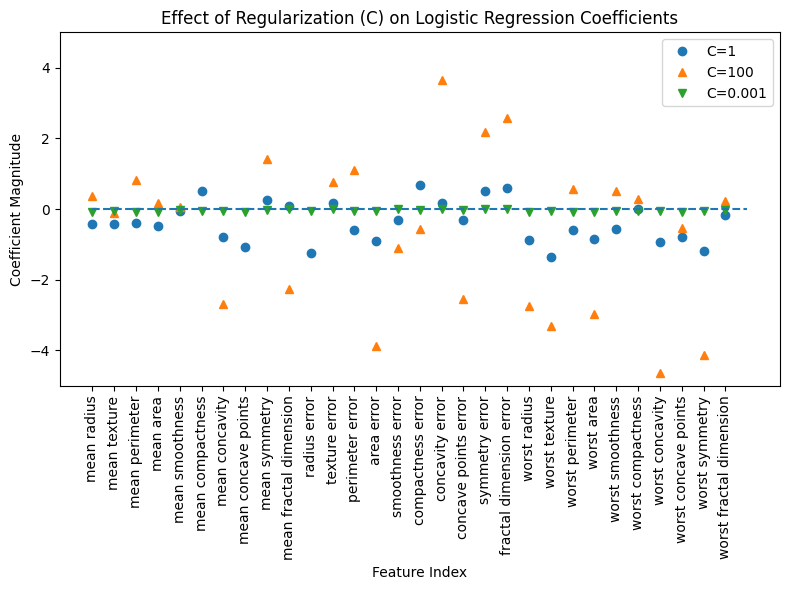

In [22]:
plt.figure(figsize=(8, 6))

plt.plot(logreg1.coef_.T,     'o', label="C=1")
plt.plot(logreg100.coef_.T,   '^', label="C=100")
plt.plot(logreg001.coef_.T,   'v', label="C=0.001")

plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.hlines(0, 0, X_train.shape[1], linestyles='dashed')
plt.ylim(-5, 5)
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Magnitude")
plt.title("Effect of Regularization (C) on Logistic Regression Coefficients")
plt.legend()
plt.tight_layout()
plt.show()


## Multimodal logistic regression (Small, Medium, Large Tumor)

In [13]:
# Create 3 classes from target using mean area feature
df_multi = df_scaled.copy()
df_multi['target_multi'] = pd.qcut(df['mean area'], q=3, labels=[0, 1, 2])

X_multi = df_multi.drop(['target', 'target_multi'], axis=1)
y_multi = df_multi['target_multi']

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

model_multi = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=10000)
model_multi.fit(X_train_m, y_train_m)
y_pred_multi = model_multi.predict(X_test_m)

print("🔹 Multinomial Logistic Regression:")
print(confusion_matrix(y_test_m, y_pred_multi))
print(classification_report(y_test_m, y_pred_multi))


🔹 Multinomial Logistic Regression:
[[38  1  0]
 [ 4 32  0]
 [ 0  3 36]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.94        39
           1       0.89      0.89      0.89        36
           2       1.00      0.92      0.96        39

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



## Ordinal Logistric Regression(Ordered multiclass classification) low, medium, high

In [14]:
from statsmodels.miscmodels.ordinal_model import OrderedModel
from sklearn.preprocessing import OrdinalEncoder

# Use a small subset for clarity
df_ord = df_scaled[['mean radius', 'mean smoothness']].copy()
df_ord['ordinal_target'] = pd.qcut(df['mean area'], q=3, labels=["low", "medium", "high"])

# Convert ordinal labels to ordered integers
encoder = OrdinalEncoder(categories=[["low", "medium", "high"]])
df_ord['ordinal_target_encoded'] = encoder.fit_transform(df_ord[['ordinal_target']]).astype(int)

# Fit ordinal logistic regression model
ord_model = OrderedModel(df_ord['ordinal_target_encoded'],
                         df_ord[['mean radius', 'mean smoothness']],
                         distr='logit')  # can use 'probit' too

ord_result = ord_model.fit(method='bfgs')

print(ord_result.summary())


Optimization terminated successfully.
         Current function value: 0.016277
         Iterations: 66
         Function evaluations: 69
         Gradient evaluations: 69
                               OrderedModel Results                               
Dep. Variable:     ordinal_target_encoded   Log-Likelihood:                -9.2618
Model:                       OrderedModel   AIC:                             26.52
Method:                Maximum Likelihood   BIC:                             43.90
Date:                    Tue, 08 Jul 2025                                         
Time:                            05:47:45                                         
No. Observations:                     569                                         
Df Residuals:                         565                                         
Df Model:                               2                                         
                      coef    std err          z      P>|z|      [0.025      0.97

## Oridinal Prediction

In [15]:
# Predict classes
pred_ord = ord_result.predict(df_ord[['mean radius', 'mean smoothness']])
predicted_classes = pred_ord.idxmax(axis=1)

from sklearn.metrics import confusion_matrix, classification_report
print("🔹 Ordinal Logistic Regression (classification report):")
print(classification_report(df_ord['ordinal_target_encoded'], predicted_classes))

🔹 Ordinal Logistic Regression (classification report):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       190
           1       0.99      0.99      0.99       189
           2       0.99      0.99      0.99       190

    accuracy                           0.99       569
   macro avg       0.99      0.99      0.99       569
weighted avg       0.99      0.99      0.99       569



## Comparision

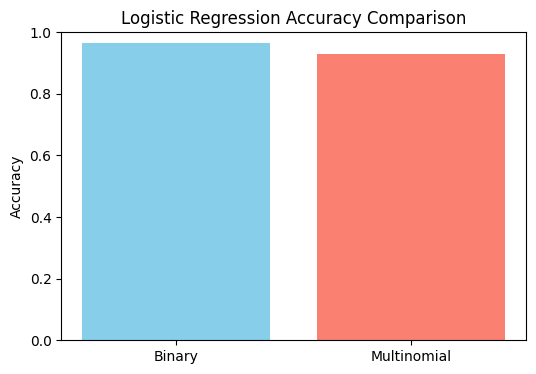

In [16]:
from sklearn.metrics import accuracy_score

acc_bin = accuracy_score(y_test, y_pred_bin)
acc_multi = accuracy_score(y_test_m, y_pred_multi)

plt.figure(figsize=(6, 4))
plt.bar(['Binary', 'Multinomial'], [acc_bin, acc_multi], color=['skyblue', 'salmon'])
plt.ylabel("Accuracy")
plt.title("Logistic Regression Accuracy Comparison")
plt.ylim(0, 1)
plt.show()


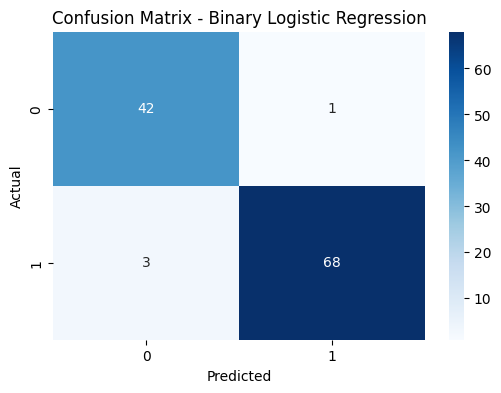

In [17]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_bin), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Binary Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


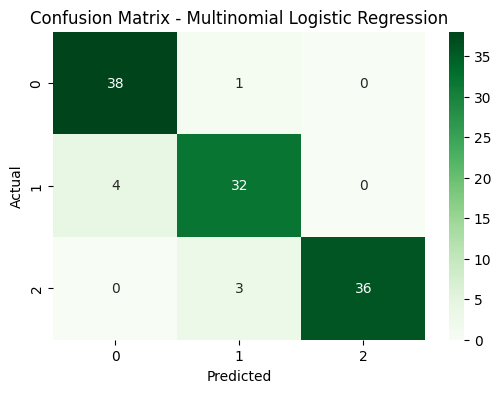

In [18]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_m, y_pred_multi), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Multinomial Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
